In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
plt.style.use("dark_background")
plt.rcParams['axes.labelsize'] = '14'

data = pd.read_csv("../data/pilot0/participant_1_2021_05_22_20_32.csv", sep="\t")
data["p_go_decision"] = data.decision == "go"
data = data[(data.RT>0) & (data.RT<2.5)]
print(data)

     participant_id  d_condition  tau_condition  a_condition decision     RT  \
1                 1           30            5.0         -2.0       go  1.017   
2                 1           60            5.0          0.0       go  0.800   
3                 1           60            3.5          0.0       go  0.567   
4                 1           30            3.5          4.0       go  2.467   
5                 1           60            5.0          0.0     stay  0.850   
..              ...          ...            ...          ...      ...    ...   
114               1           60            5.0          4.0     stay  2.350   
115               1           30            3.5          4.0     stay  1.800   
116               1           60            5.0          4.0     stay  2.367   
118               1           60            5.0          4.0     stay  2.400   
119               1           30            5.0         -2.0       go  0.967   

     p_go_decision  
1             True

c:\users\nwmbeckers\repositories\cognitive-av\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


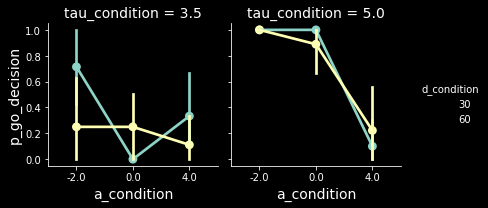

In [3]:
g = sns.FacetGrid(data, col="tau_condition", hue="d_condition", margin_titles=True)
g.map(sns.pointplot, "a_condition", "p_go_decision")
g.add_legend()

c:\users\nwmbeckers\repositories\cognitive-av\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


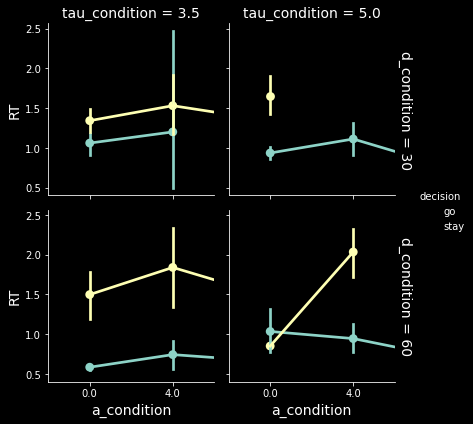

In [4]:
g = sns.FacetGrid(data, row="d_condition", col="tau_condition", hue="decision", margin_titles=True)
g.map(sns.pointplot, "a_condition", "RT")
g.add_legend()